# Proyecto Final - Física Computacional

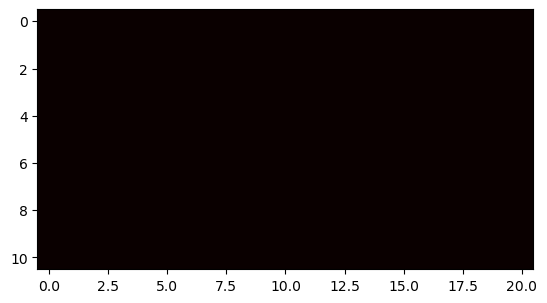

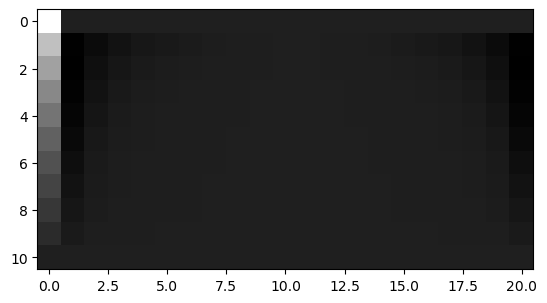

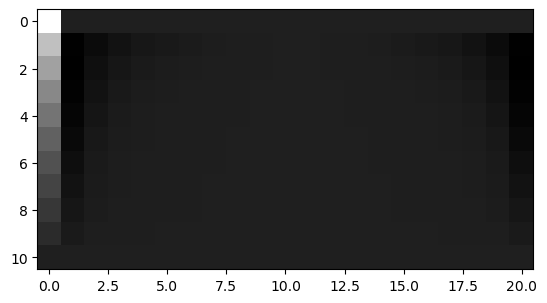

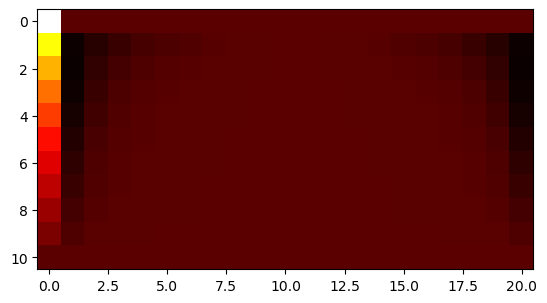

In [11]:
import numpy as np  # Biblioteca para cálculos matemáticos
import matplotlib.pyplot as plt  # Biblioteca para crear gráficos

def temperaturas(cond_inicial, ancho, alto, omega):
    # Crear la grilla inicial de temperaturas
    phi = np.zeros((ancho + 1, alto + 1), dtype=float)

    # Condición inicial en el borde izquierdo de la grilla
    phi[0, :] = cond_inicial  

    # Copia de la grilla para comparar la diferencia de temperatura
    phi_copy = phi.copy()  

    delta = 1.0  # Diferencia entre phi inicial y el modificado

    # Método iterativo de Gauss-Seidel
    while delta > 1e-5:  # Verifica que el error sea suficientemente pequeño
        for i in range(1, ancho):  # Evitar sobreescribir los bordes
            for j in range(1, alto):  # Evitar sobreescribir los bordes
                # Condición de frontera: T = 280 K en bordes
                if i == 0 or i == ancho or j == 0 or j == alto: 
                    phi[i, j] = 280
                else:  # Método de Gauss-Seidel para aproximar el cambio de T
                    phi[i, j] = (1 + omega) * 0.25 * (phi[i + 1, j] + phi[i - 1, j] + phi[i, j + 1] + phi[i, j - 1]) - omega * phi[i, j]

        # Calcular el error como la diferencia máxima
        delta = np.max(np.abs(phi - phi_copy))  

        # Actualizar la copia de la grilla
        phi_copy = phi.copy()

    return phi

# Ejemplo 1: Condición Inicial Ti = 0
fourier_t = np.fft.fft(temperaturas(0, 10, 20, 0))

plt.imshow(fourier_t.real)  # Mostrar solo la parte real de la transformada
plt.gray()
plt.show()

# Ejemplo 2: Condición Inicial Ti = 50 K
fourier_t = np.fft.fft(temperaturas(50, 10, 20, 0))

plt.imshow(fourier_t.real)  # Mostrar solo la parte real de la transformada
plt.gray()
plt.show()

# Ejemplo 3: Condición Inicial Ti = 170 K
fourier_t = np.fft.fft(temperaturas(170, 10, 20, 0))

plt.imshow(fourier_t.real)  # Mostrar solo la parte real de la transformada
plt.gray()
plt.show()

# Ejemplo 4: Condición Inicial Ti = 300 K
fourier_t = np.fft.fft(temperaturas(300, 10, 20, 0))

plt.imshow(fourier_t.real)  # Mostrar solo la parte real de la transformada
plt.gray()
plt.show()



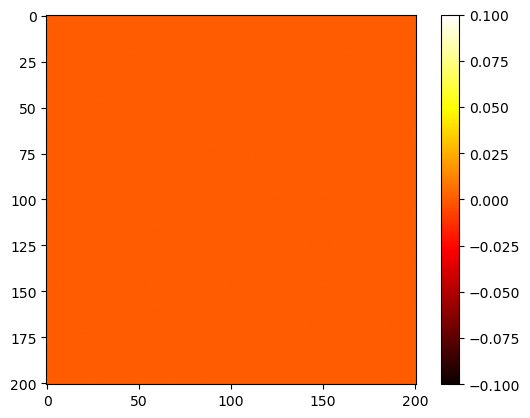

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def ecuacion_calor_fft(cond_inicial, ancho, alto, tiempo, kappa):
    # Crear la grilla inicial de temperaturas
    phi = np.zeros((ancho + 1, alto + 1), dtype=float)
    phi[0, :] = cond_inicial  # Condición inicial en el borde

    # Transformada de Fourier de la grilla inicial
    phi_hat = np.fft.fft2(phi)

    # Crear una grilla de frecuencias
    Lx = ancho + 1
    Ly = alto + 1
    kx = np.fft.fftfreq(Lx, 1.0 / Lx)
    ky = np.fft.fftfreq(Ly, 1.0 / Ly)
    KX, KY = np.meshgrid(kx, ky)
    k2 = KX**2 + KY**2  # El cuadrado de las frecuencias

    # Evolución temporal en el dominio de la frecuencia
    phi_hat_t = phi_hat * np.exp(-kappa * k2 * tiempo)

    # Transformada inversa para obtener la solución en el dominio físico
    phi_t = np.fft.ifft2(phi_hat_t)

    return np.real(phi_t)

# Condición inicial
phi_inicial = 0  # Temperatura inicial en el borde
ancho, alto = 200, 200  # Resolución de la grilla
tiempo = 50  # Tiempo de simulación
kappa = 0.01  # Coeficiente de difusión

# Resolver la ecuación de calor con FFT
phi_resultado = ecuacion_calor_fft(phi_inicial, ancho, alto, tiempo, kappa)

# Visualizar el resultado
plt.imshow(phi_resultado, cmap='hot')
plt.colorbar()
plt.show()
